# Sales Analysis


## Project Statement:

AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities.
The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions. The CEO has tasked the Head of Sales and Marketing (S&M) of AAL to:
   1. Determine the states that are generating the highest revenues and
   2. Formulate sales programs for states with lower revenues. The Head of S&M has approached you for the same.
Analyze the company’s sales data for the fourth quarter across Australia, and state by state and help the company make data-driven decisions for the coming year.


![6.jpg](attachment:b2096501-7f1c-46af-a9aa-aa334578a8ae.jpg)

## Step 0: Import libraries

In [1]:
import pandas as pd
import numpy as np
#import pycountry
import datetime
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
#from statsmodels.stats.weightstats import ztest as ztest
#from statsmodels.multivariate.manova import MANOVA
#import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from plotly.subplots import make_subplots


import warnings
warnings.filterwarnings('ignore')

## Step 1: Import Data

- Read dataset

In [2]:
df = pd.read_excel('1688639662_ausapparalsales4thqrt2020.xlsx',parse_dates = True)

- Check memory usage per column.

In [3]:
df.memory_usage(deep=True)

Index       132
Date      60480
Time     496440
State    457920
Group    474390
Unit      60480
Sales     60480
dtype: int64

- Check data general info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


- Check stats of each column in df

In [5]:
df.describe()

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


## Step 2: Data Cleaning + Preprocessing

### Data in general:

#### 1. Duplicated records

In [6]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Date, Time, State, Group, Unit, Sales]
Index: []


#### 2. Invalid entries

In [7]:
print(df['Time'].unique())
print(df['State'].unique())
print(df['Group'].unique())

[' Morning' ' Afternoon' ' Evening']
[' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
[' Kids' ' Men' ' Women' ' Seniors']


#### 3. Rename Cols & formatting

In [8]:
# Convert object to string
df['Time'] = df['Time'].astype('string')
df['State'] = df['State'].astype('string')
df['Group'] = df['Group'].astype('string')

#### 4. Data Type check

In [9]:
df.dtypes

Date     datetime64[ns]
Time     string[python]
State    string[python]
Group    string[python]
Unit              int64
Sales             int64
dtype: object

### Numeric

#### 1. Missing entries
- Check missing entries

In [10]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

#### 2. Local values

In [11]:
print('Unit: min =', df['Unit'].min(), ', max =', df['Unit'].max())
print('Sales: min =', df['Sales'].min(), ', max =', df['Sales'].max())

Unit: min = 2 , max = 65
Sales: min = 5000 , max = 162500


#### 3. Identifying outliers
  - We checked for outliers in 'Unit' and 'Sales'
  - An outlier is identified if its value in not between the Lower and Upper Bound.
    - Lower Bound: (Q1 - 1.5 * IQR)
    - Upper Bound: (Q3 + 1.5 * IQR)

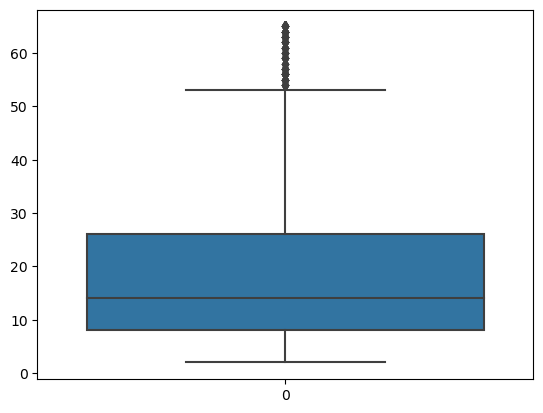

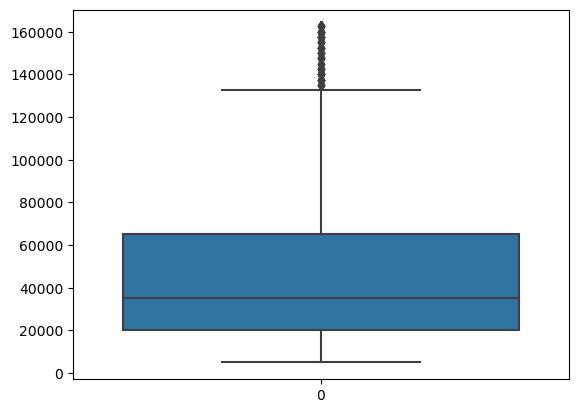

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


In [12]:
sns.boxplot(df["Unit"])
plt.show()

sns.boxplot(df['Sales'])
plt.show()

df['Unit'].describe()
_25, _75 = np.percentile(df["Unit"],[25,75])
irq = _75 - _25
unit_upper = _75 + 1.5*irq
unit_lower = _25 - 1.5*irq


df['Sales'].describe()
_25, _75 = np.percentile(df["Sales"],[25,75])
irq = _75 - _25
sales_upper = ( _75 + 1.5*irq)
sales_lower = ( _25 - 1.5*irq)

df.describe()

4. Normaization

In [13]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'Unit' column and add it to the DataFrame
df['normalized_Unit'] = scaler.fit_transform(df[['Unit']])

# Fit and transform the 'Sales' column and add it to the DataFrame
df['normalized_Sales'] = scaler.fit_transform(df[['Sales']])

df.describe()

,Date,Unit,Sales,normalized_Unit,normalized_Sales
count,7560,7560.000000,7560.000000,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201,0.254054,0.254054
min,2020-10-01 00:00:00,2.000000,5000.000000,0.000000,0.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000,0.095238,0.095238
50%,2020-11-15 12:00:00,14.000000,35000.000000,0.190476,0.190476
75%,2020-12-08 00:00:00,26.000000,65000.000000,0.380952,0.380952
max,2020-12-30 00:00:00,65.000000,162500.000000,1.000000,1.000000
std,NaN,12.901403,32253.506944,0.204784,0.204784


### Categorical

#### 1. Missing values
- Check missing entries

In [14]:
df.isnull().sum()

Date                0
Time                0
State               0
Group               0
Unit                0
Sales               0
normalized_Unit     0
normalized_Sales    0
dtype: int64

## Step 3: Data Analysis

### Perform descriptive statistical analysis on the data (Sales and Unit columns).

In [15]:
df.describe()

,Date,Unit,Sales,normalized_Unit,normalized_Sales
count,7560,7560.000000,7560.000000,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201,0.254054,0.254054
min,2020-10-01 00:00:00,2.000000,5000.000000,0.000000,0.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000,0.095238,0.095238
50%,2020-11-15 12:00:00,14.000000,35000.000000,0.190476,0.190476
75%,2020-12-08 00:00:00,26.000000,65000.000000,0.380952,0.380952
max,2020-12-30 00:00:00,65.000000,162500.000000,1.000000,1.000000
std,NaN,12.901403,32253.506944,0.204784,0.204784


### Determine which group is generating the highest sales, and which group is generating the lowest sales.

In [16]:
# Group by 'Group' and sum their sales
grouped_sales = df.groupby('Group').Sales.sum()

# Find the group names with maximum and minimum sales
group_max_sales = grouped_sales.idxmax()
group_min_sales = grouped_sales.idxmin()

df.groupby('Group').Unit.sum()[0]
print('{} generate the highest sales, while {} generate the lowest sales.'.format(group_max_sales,group_min_sales))

 Men generate the highest sales, while  Seniors generate the lowest sales.


### Determine which state is generating the highest sales, and which state is generating the lowest sales.

In [17]:
# Group by 'State' and sum their sales
state_sales = df.groupby('State').Sales.sum()

# Find the group names with maximum and minimum sales
state_max_sales = state_sales.idxmax()
state_min_sales = state_sales.idxmin()

df.groupby('State').Unit.sum()[0]
print('{} generate the highest sales, while {} generate the lowest sales.'.format(state_max_sales,state_min_sales))

 VIC generate the highest sales, while  WA generate the lowest sales.


### Generate weekly, monthly and quarterly reports for the analysis made.

In [18]:
df.set_index('Date', inplace=True)  # Set date column as index

In [19]:
# Weekly Report: resample by week and start with Monday
weekly_report = df.resample('W-MON').sum()
print("Weekly Report:")
print(weekly_report)

Weekly Report:
                                                         Time  \
Date                                                            
2020-10-05   Morning Morning Morning Morning Afternoon Aft...   
2020-10-12   Morning Morning Morning Morning Afternoon Aft...   
2020-10-19   Morning Morning Morning Morning Afternoon Aft...   
2020-10-26   Morning Morning Morning Morning Afternoon Aft...   
2020-11-02   Morning Morning Morning Morning Afternoon Aft...   
2020-11-09   Morning Morning Morning Morning Afternoon Aft...   
2020-11-16   Morning Morning Morning Morning Afternoon Aft...   
2020-11-23   Morning Morning Morning Morning Afternoon Aft...   
2020-11-30   Morning Morning Morning Morning Afternoon Aft...   
2020-12-07   Morning Morning Morning Morning Afternoon Aft...   
2020-12-14   Morning Morning Morning Morning Afternoon Aft...   
2020-12-21   Morning Morning Morning Morning Afternoon Aft...   
2020-12-28   Morning Morning Morning Morning Afternoon Aft...   
2021-01-04

In [20]:
# Monthly Report: resample by month
monthly_report = df.resample('M').sum()
print("Monthly Report:")
print(monthly_report)

Monthly Report:
                                                         Time  \
Date                                                            
2020-10-31   Morning Morning Morning Morning Afternoon Aft...   
2020-11-30   Morning Morning Morning Morning Afternoon Aft...   
2020-12-31   Morning Morning Morning Morning Afternoon Aft...   

                                                        State  \
Date                                                            
2020-10-31   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   
2020-11-30   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   
2020-12-31   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   

                                                        Group   Unit  \
Date                                                                   
2020-10-31   Kids Men Women Seniors Kids Men Women Seniors...  45716   
2020-11-30   Kids Men Women Seniors Kids Men Women Seniors...  36273   
2020-12-31   Kids Men Women Seniors Kids Men

In [21]:
# Monthly Report: resample by quarters (3 months)
quarterly_report = df.resample('Q').sum()
print("Quarterly Report:")
print(quarterly_report)

Quarterly Report:
                                                         Time  \
Date                                                            
2020-12-31   Morning Morning Morning Morning Afternoon Aft...   

                                                        State  \
Date                                                            
2020-12-31   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   

                                                        Group    Unit  \
Date                                                                    
2020-12-31   Kids Men Women Seniors Kids Men Women Seniors...  136121   

                Sales  normalized_Unit  normalized_Sales  
Date                                                      
2020-12-31  340302500      1920.650794       1920.650794  


## Step 4: Visualization

In [23]:
df_daily = df.resample('D').sum()


# Creating the dashboard
fig = make_subplots(rows=2, cols=4, subplot_titles=("State-wise Sales Analysis", "Group-wise Sales Analysis", "Time-of-the-day Analysis", "Sales Trends Analysis Daily","Sales Trends Analysis Weeakly ","Sales Trends Analysis Monthly ",' ',"Sales Trends Analysis Quarterly"))

# State-wise sales analysis for different groups
fig.add_trace(go.Bar(x=df['State'], y=df['Sales'], name='Sales', marker=dict(color='rgb(34, 111, 255)')), row=1, col=1)
fig.add_trace(go.Bar(x=df['State'], y=df['normalized_Sales'], name='Normalized Sales'), row=1, col=1)

# Group-wise sales analysis across different states
fig.add_trace(go.Bar(x=df['Group'], y=df['Sales'], name='Sales'), row=1, col=2)
fig.add_trace(go.Bar(x=df['Group'], y=df['normalized_Sales'], name='Normalized Sales', marker=dict(color='rgb(55, 83, 109)')), row=1, col=2)

# Time-of-the-day analysis
df_time_analysis = df.groupby('Time').sum().reset_index()  # Aggregating data for time analysis
fig.add_trace(go.Bar(x=df_time_analysis['Time'], y=df_time_analysis['Sales'],  name='Sales'), row=1, col=3)
fig.add_trace(go.Bar(x=df_time_analysis['Time'], y=df_time_analysis['normalized_Sales'],  name='Normalized Sales'), row=1, col=3)

# Add traces for sales trends
fig.add_trace(go.Scatter(x=df_daily.index, y=df_daily['Sales'], mode='lines+markers', name='Daily Sales'), row=1, col=4)
fig.add_trace(go.Scatter(x=weekly_report.index, y=weekly_report['Sales'], mode='lines+markers', name='Weekly Sales'), row=2, col=1)
fig.add_trace(go.Scatter(x=monthly_report.index, y=monthly_report['Sales'], mode='lines+markers', name='Monthly Sales'), row=2, col=2)
fig.add_trace(go.Scatter(x=quarterly_report.index, y=quarterly_report['Sales'], mode='lines+markers', name='Quarterly Sales'), row=2, col=4)
# Update layout
fig.update_layout(showlegend=False, title_text="Sales Dashboard for S&M Head")

# Update layout to change the plot background color
fig.update_layout(
    plot_bgcolor='rgb(50, 50, 50)'
)
# Show the plots
fig.show()

Bar Plots for State-wise and Group-wise Sales Analysis: Plotly's bar plot functionality is well-suited for comparing sales across different states and groups. Its customizability allows the user to set specific colors and formatting, enhancing the visual representation and facilitating easy interpretation of the sales data by the Head of Sales and Marketing.

Bar Plots for Time-of-the-day Analysis: While the provided code utilizes bar plots for time-of-the-day analysis, an alternative or complementary approach could be to use line plots to demonstrate the trends and fluctuations in sales over time. However, bar plots effectively display the distribution of sales across different times of the day, enabling quick comparisons and insights into peak and off-peak sales periods.

Line Plots for Sales Trends Analysis: Plotly's line plot functionality is particularly well-suited for illustrating sales trends over various time intervals, such as daily, weekly, monthly, and quarterly periods. The use of lines and markers aids in visualizing the overall trends, allowing the Head of Sales and Marketing to discern any patterns or fluctuations in sales performance over time.